<a href="https://colab.research.google.com/github/rajayourfriend/AI6-Assignments/blob/master/Assignment6_A_001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Task
     Take original file run for 100 epochs whatever is achieved as val_acc, try to get it with self created model with less than 100 epochs

---
###Assignment6_00.ipynb
---


params=1,172,410  
epochs=100  
val_acc=83.44% at the end

epochs=13
val_acc = 80%
  
Model took 889.56 seconds to train

---
###Assignment6_A_01.ipynb

---
params=916,280  
epochs=70 
val_acc=83.7% 

epochs=18
val_acc = 80%
  
Model took 5466.61 seconds to train to reach 99 epochs

In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 2s 0us/step


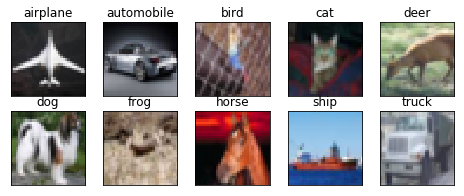

In [0]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
# Define the model
from keras.layers import Input

from keras.layers.advanced_activations import LeakyReLU
from keras.layers.merge import Concatenate
from keras.models import Model
from keras.layers import Lambda, GlobalAveragePooling2D

dropoutValue = 0.1
f = 100

input = Input(shape=(32, 32, 3,))#Functional API for input layer

#(32x32x3) (c) (3x3x3)xf => (30x30xf)
x = Convolution2D(f, (3,3), strides=(1,1), name='conv_1', use_bias=False)(input)#Normal Convolution
x = BatchNormalization()(x)
x = LeakyReLU(alpha=0.1)(x)
x = Dropout(dropoutValue)(x)

#(30x30xf) (c) (3x3xf)xf => (28x28xf)
x = Convolution2D(f, (3,3), strides=(1,1), name='conv_2', use_bias=False)(x)#Normal Convolution
x = BatchNormalization()(x)
x = LeakyReLU(alpha=0.1)(x)
x = Dropout(dropoutValue)(x)

#(28x28xf) (c) (3x3xf)xf => (26x26xf)
x = Convolution2D(f, (3,3), strides=(1,1), name='conv_3', use_bias=False)(x)#Normal Convolution
x = BatchNormalization()(x)
x = LeakyReLU(alpha=0.1)(x)
x = Dropout(dropoutValue)(x)

#(26x26xf) (c) (3x3xf)xf => (24x24xf)
x = Convolution2D(f, (3,3), strides=(1,1), name='conv_4', use_bias=False)(x)#Normal Convolution
x = BatchNormalization()(x)
x = LeakyReLU(alpha=0.1)(x)
x = Dropout(dropoutValue)(x)

#x = MaxPooling2D(pool_size=(2, 2), name='max_pool_1')(x)#MaxPooling

#(24x24xf) (c) (1x1xf)x(f-5) => (24x24x40)
x = Convolution2D(f-5, (1,1), strides=(1,1), name='conv_5', use_bias=False)(x)#Normal Convolution
x = BatchNormalization()(x)
x = LeakyReLU(alpha=0.1)(x)

#(24x24x40) (c) (3x3x40)xf => (22x22xf)
x = Convolution2D(f, (3,3), strides=(1,1), name='conv_6', use_bias=False)(x)#Normal Convolution
x = BatchNormalization()(x)
x = LeakyReLU(alpha=0.1)(x)
x = Dropout(dropoutValue)(x)

#(22x22xf) (c) (3x3xf)xf => (20x20xf)
x = Convolution2D(f, (3,3), strides=(1,1), name='conv_7', use_bias=False)(x)#Normal Convolution
x = BatchNormalization()(x)
x = LeakyReLU(alpha=0.1)(x)
x = Dropout(dropoutValue)(x)

#(20x20xf) (c) (3x3xf)xf => (18x18xf)
x = Convolution2D(f, (3,3), strides=(1,1), name='conv_8', use_bias=False)(x)#Normal Convolution
x = BatchNormalization()(x)
x = LeakyReLU(alpha=0.1)(x)
x = Dropout(dropoutValue)(x)


#x = MaxPooling2D(pool_size=(2, 2), name='max_pool_2')(x)#MaxPooling

#(18x18xf) (c) (1x1xf)x40 => (18x18x40)
x = Convolution2D(40, (1,1), strides=(1,1), name='conv_9', use_bias=False)(x)#Normal Convolution
x = BatchNormalization()(x)
x = LeakyReLU(alpha=0.1)(x)
x = Dropout(dropoutValue)(x)

#(18x18xf) (c) (3x3xf)xf => (16x16xf)
x = Convolution2D(f, (3,3), strides=(1,1), name='conv_10', use_bias=False)(x)#Normal Convolution
x = BatchNormalization()(x)
x = LeakyReLU(alpha=0.1)(x)
x = Dropout(dropoutValue)(x)

#(16x16xf) (c) (3x3xf)xf => (14x14xf)
x = Convolution2D(f, (3,3), strides=(1,1), name='conv_11', use_bias=False)(x)#Normal Convolution
x = BatchNormalization()(x)
x = LeakyReLU(alpha=0.1)(x)
x = Dropout(dropoutValue)(x)

#(14x14xf) (c) (3x3xf)xf => (12x12xf)
x = Convolution2D(f, (3,3), strides=(1,1), name='conv_12', use_bias=False)(x)#Normal Convolution
x = BatchNormalization()(x)
x = LeakyReLU(alpha=0.1)(x)
x = Dropout(dropoutValue)(x)

#(12x12xf) (c) (12x12xf)x10 => (1x1x10)
x = Convolution2D(10, (12,12), strides=(1,1), name='conv_13', use_bias=False)(x)#Normal Convolution
x = BatchNormalization()(x)
x = LeakyReLU(alpha=0.1)(x)
x = Dropout(dropoutValue)(x)

#x = Flatten()(x)
gap = GlobalAveragePooling2D(name='global_average_pooling_1')(x) #Global Average Pooling

#output = Activation('softmax')(x)
output = Activation('softmax')(gap)
model = Model(inputs=[input], outputs=[output])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



W0617 12:36:44.230852 140175737284480 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0617 12:36:44.267154 140175737284480 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0617 12:36:44.275006 140175737284480 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0617 12:36:44.308473 140175737284480 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0617 12:36:44.309351 1401757372

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv_1 (Conv2D)              (None, 30, 30, 100)       2700      
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 30, 100)       400       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 30, 30, 100)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 30, 100)       0         
_________________________________________________________________
conv_2 (Conv2D)              (None, 28, 28, 100)       90000     
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 100)       400       
__________

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, callbacks=[<keras.ca..., steps_per_epoch=390, epochs=99)`
W0617 12:48:50.764578 140175737284480 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future

Epoch 1/99

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
390/390 [==============================] - 62s 159ms/step - loss: 1.7611 - acc: 0.3885 - val_loss: 5.2129 - val_acc: 0.2173

Epoch 00001: val_acc improved from -inf to 0.21730, saving model to /gdrive/My Drive/Colab Notebooks/EVA/Assignment6/3/saved_weight_eva_assign6a.hdf5
Epoch 2/99

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
390/390 [==============================] - 56s 143ms/step - loss: 1.4467 - acc: 0.5143 - val_loss: 1.8782 - val_acc: 0.4004

Epoch 00002: val_acc improved from 0.21730 to 0.40040, saving model to /gdrive/My Drive/Colab Notebooks/EVA/Assignment6/3/saved_weight_eva_assign6a.hdf5
Epoch 3/99

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
390/390 [==============================] - 55s 141ms/step - loss: 1.2724 - acc: 0.5789 - val_loss: 1.2874 - val_acc: 0.5598

Epoch 00003: val_acc improved from 0.40040 to 0.55980, saving model to 

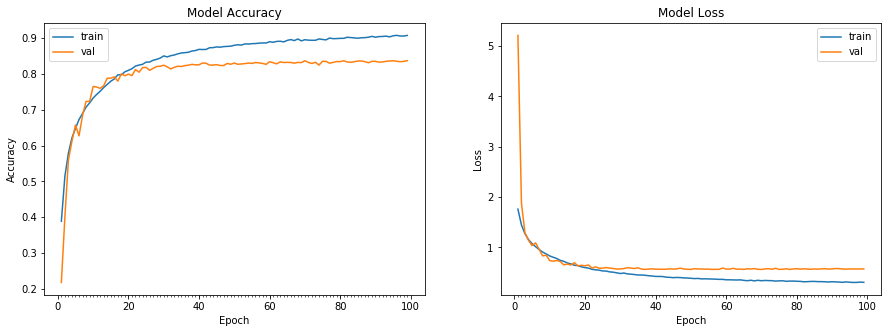

Accuracy on test data is: 83.72


In [0]:
from keras.preprocessing.image import ImageDataGenerator

from keras.callbacks import LearningRateScheduler
#from skimage import exposure, color
from keras.callbacks import ModelCheckpoint
from google.colab import drive

def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

drive.mount('/gdrive')
#!ls '/gdrive/My Drive/Colab Notebooks/EVA/Assignment6'
snapshot_filepath = "/gdrive/My Drive/Colab Notebooks/EVA/Assignment6/3/saved_weight_eva_assign6a.hdf5"
checkpoint_savebest = ModelCheckpoint(snapshot_filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
    
datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)

# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 99, 
                                 validation_data = (test_features, test_labels), verbose=1,
                                 callbacks=[checkpoint_savebest, LearningRateScheduler(scheduler, verbose=1)])
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))